In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_cluster = pd.read_csv('C:\\Users\\Pushkar\\OneDrive - The University of Kansas\\Test_DS_col\\mergedData.csv')

In [3]:
# divided the TempGlobal i.e. the continuous data into 3 bins and created a new column i.e. TempGlobal_bins
df_cluster_disct = df_cluster.copy(deep=True)
df_cluster_disct['TempGlobal_bins']=pd.cut(df_cluster_disct['TempGlobal'], 3,labels=["Low", "Medium", "High"])

In [4]:
df_cluster_disct.head(5)

,year,SeaLevel,Coal,Oil,Gas,CO2-Concentration,TempGlobal,TempLand,TempGlobal_bins
0,1900,-130.1,5727.78236,180.5557,63.88894,1880.29881,15.143917,8.501583,Low
1,1901,-130.5,5727.78236,180.5557,63.88894,1942.99709,15.073333,8.541917,Low
2,1902,-125.9,5727.78236,180.5557,63.88894,1996.90205,14.958333,8.304417,Low
3,1903,-117.9,5727.78236,180.5557,63.88894,2186.94199,14.836583,8.220167,Low
4,1904,-128.2,5727.78236,180.5557,63.88894,2202.66794,14.810417,8.090917,Low


In [5]:
#[(14.775, 15.204] = Low
# (15.204, 15.631] = Medium
# (15.631, 16.059]] = High

pd.cut(df_cluster_disct['TempGlobal'], 3).head()

0    (14.775, 15.204]
1    (14.775, 15.204]
2    (14.775, 15.204]
3    (14.775, 15.204]
4    (14.775, 15.204]
Name: TempGlobal, dtype: category
Categories (3, interval[float64]): [(14.775, 15.204] < (15.204, 15.631] < (15.631, 16.059]]

In [6]:
df_cluster_disct.head()

,year,SeaLevel,Coal,Oil,Gas,CO2-Concentration,TempGlobal,TempLand,TempGlobal_bins
0,1900,-130.1,5727.78236,180.5557,63.88894,1880.29881,15.143917,8.501583,Low
1,1901,-130.5,5727.78236,180.5557,63.88894,1942.99709,15.073333,8.541917,Low
2,1902,-125.9,5727.78236,180.5557,63.88894,1996.90205,14.958333,8.304417,Low
3,1903,-117.9,5727.78236,180.5557,63.88894,2186.94199,14.836583,8.220167,Low
4,1904,-128.2,5727.78236,180.5557,63.88894,2202.66794,14.810417,8.090917,Low


In [7]:
df_cluster_disct.drop(['year','TempGlobal','TempLand'],axis=1,inplace=True) #dropping the Id column as it is unecessary, axis=1 specifies that it should be column wise, inplace =1 means the changes should be reflected into the dataframe

In [8]:
df_cluster_disct.head()

,SeaLevel,Coal,Oil,Gas,CO2-Concentration,TempGlobal_bins
0,-130.1,5727.78236,180.5557,63.88894,1880.29881,Low
1,-130.5,5727.78236,180.5557,63.88894,1942.99709,Low
2,-125.9,5727.78236,180.5557,63.88894,1996.90205,Low
3,-117.9,5727.78236,180.5557,63.88894,2186.94199,Low
4,-128.2,5727.78236,180.5557,63.88894,2202.66794,Low


In [10]:
df_cluster_disct.groupby('TempGlobal_bins').size()

TempGlobal_bins
Low       43
Medium    55
High      18
dtype: int64

In [11]:
# Dividing data into features and labels

In [13]:
feature_columns = ['SeaLevel', 'Coal', 'Oil','CO2-Concentration','Gas']
X = df_cluster_disct[feature_columns].values
y = df_cluster_disct['TempGlobal_bins'].values

In [14]:
# Label encoding

In [15]:
#As we can see labels are categorical.
#KNeighborsClassifier does not accept string labels.
#We need to use LabelEncoder to transform them into numbers. Low correspond to 0, Medium correspond to 1 and High correspond to 2.

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [17]:
# Spliting dataset into training set and test set

In [18]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

C:\Users\Pushkar\Anaconda3\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
#  Data Visualization

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
# Parallel Coordinates

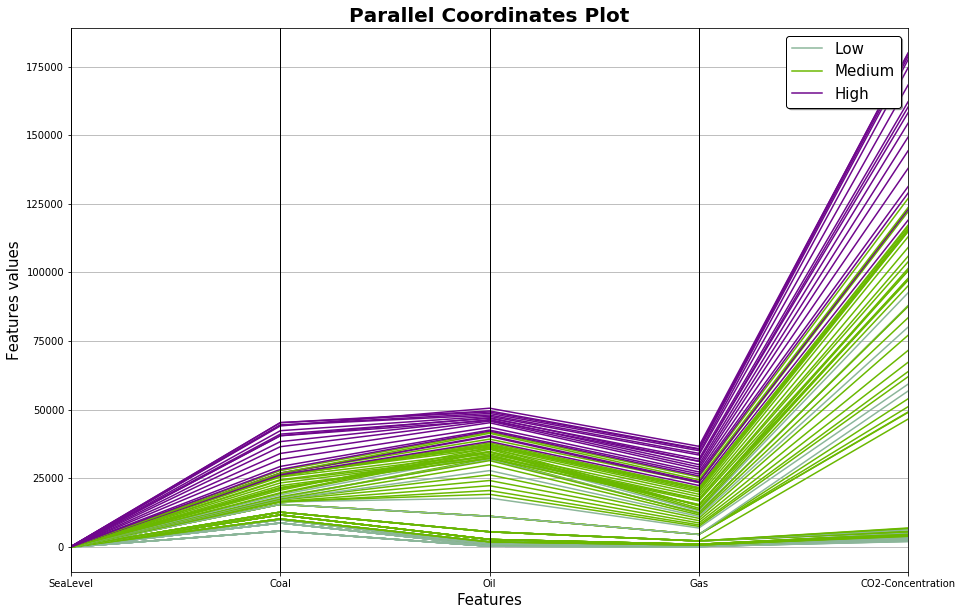

In [24]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(df_cluster_disct, "TempGlobal_bins")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()


In [25]:
# Andrews Curves

In [26]:
# Andrews curves allow one to plot multivariate data as a large number of curves that are created using the
# attributes of samples as coefficients for Fourier series. By coloring these curves differently for each class it
# is possible to visualize data clustering. Curves belonging to samples of the same class will usually be closer together
# and form larger structures

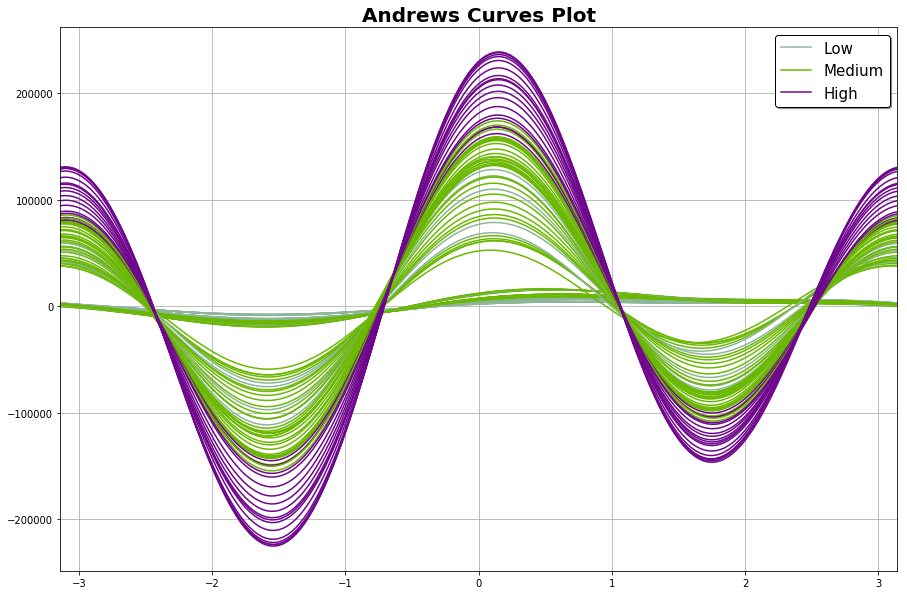

In [27]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(df_cluster_disct, "TempGlobal_bins")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [28]:
# Boxplots

<Figure size 432x288 with 0 Axes>

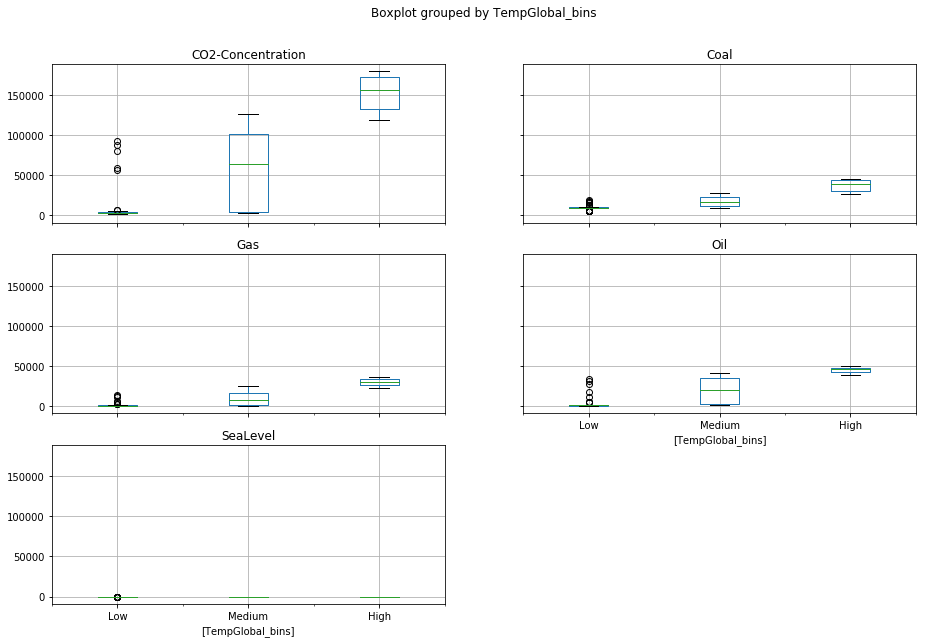

In [29]:
plt.figure()
df_cluster_disct.boxplot(by="TempGlobal_bins", figsize=(15, 10))
plt.show()